**Unzip dataset**

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/test/Dogs/
   creating: dataset/test/cats/
  inflating: dataset/test/.DS_Store  
  inflating: __MACOSX/dataset/test/._.DS_Store  
   creating: dataset/train/Dogs/
   creating: dataset/train/cats/
  inflating: dataset/train/.DS_Store  
  inflating: __MACOSX/dataset/train/._.DS_Store  
  inflating: dataset/test/Dogs/dog.775.jpg  
  inflating: __MACOSX/dataset/test/Dogs/._dog.775.jpg  
  inflating: dataset/test/Dogs/dog.577.jpg  
  inflating: __MACOSX/dataset/test/Dogs/._dog.577.jpg  
  inflating: dataset/test/Dogs/dog.205.jpg  
  inflating: __MACOSX/dataset/test/Dogs/._dog.205.jpg  
  inflating: dataset/test/Dogs/dog.365.jpg  
  inflating: __MACOSX/dataset/test/Dogs/._dog.365.jpg  
  inflating: dataset/test/Dogs/dog.359.jpg  
  inflating: __MACOSX/dataset/test/Dogs/._dog.359.jpg  
  inflat

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
from keras.callbacks import History
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.layers import BatchNormalization, LeakyReLU,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


# **Load Dataset**

In [ ]:
train_data_dir = tf.keras.utils.image_dataset_from_directory('/content/dataset/train')
test_data_dir = tf.keras.utils.image_dataset_from_directory('/content/dataset/test')

Found 650 files belonging to 2 classes.
Found 408 files belonging to 2 classes.


In [ ]:
data_iter = train_data_dir.as_numpy_iterator()

In [ ]:
batch = data_iter.next()

In [ ]:
batch[1]

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
class_names = train_data_dir.class_names
class_names

['Dogs', 'cats']

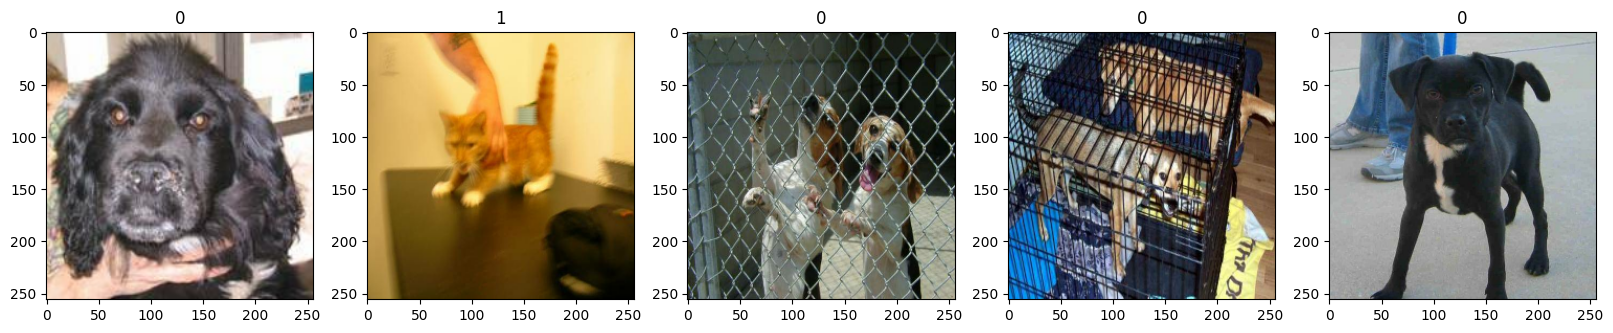

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for index, img in enumerate(batch[0][:5]):
  ax[index].imshow(img.astype(int))
  ax[index].title.set_text(batch[1][index])

# **Data Preprocessing**

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled.max()

1.0

In [ ]:
train_data_dir = train_data_dir.map(lambda x, y:(x/255,y))
test_data_dir = test_data_dir.map(lambda x, y:(x/255,y))

In [ ]:
scaled = train_data_dir.as_numpy_iterator()

In [ ]:
batch =scaled.next()

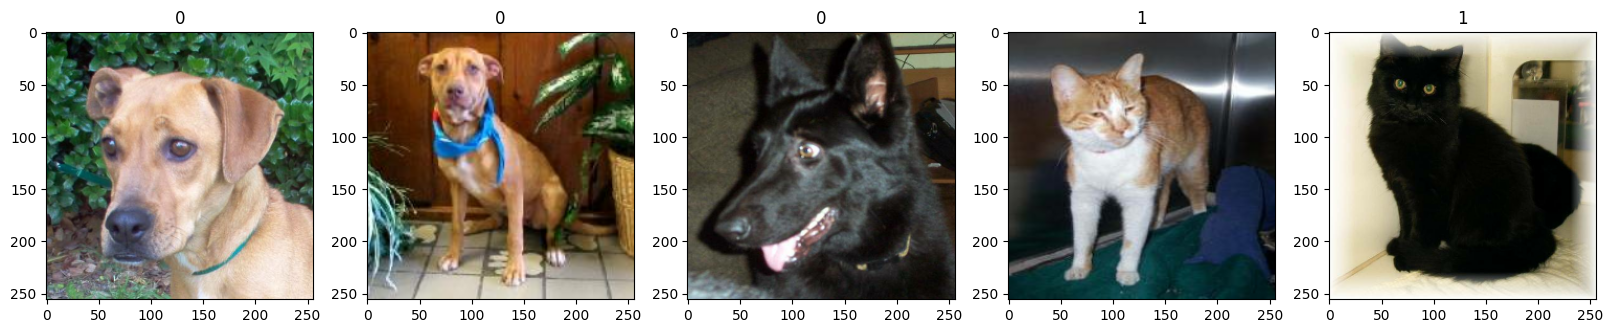

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for index, img in enumerate(batch[0][:5]):
  ax[index].imshow(img)
  ax[index].title.set_text(batch[1][index])

# **Data Spiliting**

In [ ]:
train_size = int(len(train_data_dir)*.9)
val_size = int(len(train_data_dir)*.1)+1
test_size = int(len(test_data_dir))

In [ ]:
print(f"Training size: {train_size}, Validation size: {val_size}, Test size: {test_size}")

Training size: 18, Validation size: 3, Test size: 13


In [ ]:
train = train_data_dir.take(train_size)
val = train_data_dir.skip(train_size).take(val_size)
test = test_data_dir.take(test_size)

# **CNN Model Architecture**
- Dropout = 0.1
- batch size = 32
- filter organization = same
- learning_rate=0.0001
- epochs = 30

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training'  # Use the training subset
)

validation_generator = validation_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Use the validation subset
)

Found 456 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


# **Model Training**

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[tensorboard_callback])

Epoch 1/30
15/15 [==============================] - 12s 604ms/step - loss: 0.6994 - accuracy: 0.4934 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 8s 531ms/step - loss: 0.6929 - accuracy: 0.5154 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 9s 639ms/step - loss: 0.6923 - accuracy: 0.5263 - val_loss: 0.6898 - val_accuracy: 0.5155
Epoch 4/30
15/15 [==============================] - 10s 646ms/step - loss: 0.6887 - accuracy: 0.5132 - val_loss: 0.6891 - val_accuracy: 0.5670
Epoch 5/30
15/15 [==============================] - 8s 534ms/step - loss: 0.6863 - accuracy: 0.5417 - val_loss: 0.6838 - val_accuracy: 0.5309
Epoch 6/30
15/15 [==============================] - 8s 523ms/step - loss: 0.6855 - accuracy: 0.5724 - val_loss: 0.6826 - val_accuracy: 0.5052
Epoch 7/30
15/15 [==============================] - 9s 637ms/step - loss: 0.6733 - accuracy: 0.5965 - val_loss: 0.6792 - val_accuracy: 0.5567
Epoc

# **Visualize the 'accuracy vs val_accuracy' and 'loss vs val_loss' Graph**


Text(0.5, 1.0, 'Loss')

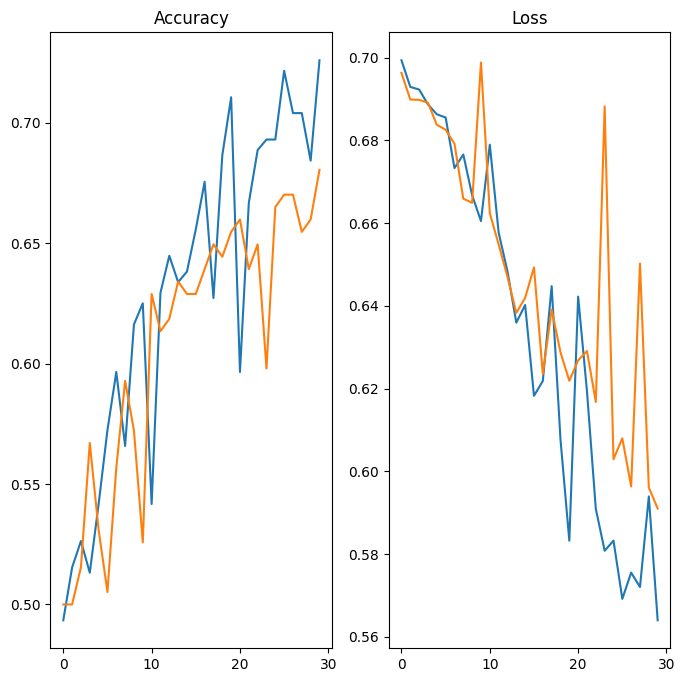

In [ ]:
epochs_range = range(30)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, hist.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, hist.history['loss'], label = 'Training loss')
plt.plot(epochs_range, hist.history['val_loss'], label = 'Validation loss' )
plt.title('Loss')

# **To perform hyperparameter tuning and avoid overfitting**

**Define the Model with Dropout and Batch Normalization**

In [ ]:
def create_model(dropout_rate=0.1, filter_organization='same', batch_norm=True):
    model = Sequential()

    filters = [16, 32, 64, 128, 256]
    if filter_organization == 'doubling':
        filters = [16, 32, 64, 128, 256]
    elif filter_organization == 'halving':
        filters = [256, 128, 64, 32, 16]

    for filter_count in filters:
        model.add(Conv2D(filter_count, (3, 3), activation='relu', input_shape=(256, 256, 3)))
        model.add(MaxPooling2D())
        if batch_norm:
            model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

    return model

**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

Found 456 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


**Hyperparameter Tuning with Weights & Biases (wandb)**

In [ ]:
!pip install wandb --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import wandb
from wandb.integration.keras import WandbCallback
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Initialize Weights & Biases
wandb.init(project='hyperparameter-tuning')

# Define the sweep configuration
sweep_configuration = {
    'method': 'random',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'dropout_rate': {
            'values': [0.1,0.2, 0.3,0.4,0.5]
        },
        'learning_rate': {
            'values': [0.01,0.001,.0001]
        },
        'filter_organization': {
            'values': ['same','halving', 'doubling']
        },
        'batch_norm': {
            'values': [True, False]
        },
        'data_augmentation': {
            'values': [True, False]
        },
        'epochs': {
            'values': [10, 20, 30]  # Adjust the epochs as needed
        }
    }
}



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
def train(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Adjust data augmentation based on config
        if config.data_augmentation:
            train_gen = train_generator
        else:
            train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3).flow_from_directory(
                "/content/dataset/train",
                target_size=(256, 256),
                batch_size=32,
                class_mode='categorical',
                subset='training'
            )

        # Create and compile the model
        model = create_model(dropout_rate=config.dropout_rate,
                             filter_organization=config.filter_organization,
                             batch_norm=config.batch_norm)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            train_gen,
            epochs=config.epochs,
            validation_data=validation_generator,
            callbacks=[WandbCallback()]
        )

# Start the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project='hyperparameter-tuning')
wandb.agent(sweep_id, train, count=20)

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x794568799cf0>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Create sweep with ID: kvl5y2hv
Sweep URL: https://wandb.ai/2020e122/hyperparameter-tuning/sweeps/kvl5y2hv


wandb: Agent Starting Run: q3qbesb2 with config:
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 20
wandb: 	filter_organization: halving
wandb: 	learning_rate: 0.01


Found 456 images belonging to 2 classes.
Epoch 1/20
 6/15 [===========>..................] - ETA: 2s - loss: 1.8579 - accuracy: 0.5000

15/15 [==============================] - ETA: 0s - loss: 1.8509 - accuracy: 0.5219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 11s 581ms/step - loss: 1.8509 - accuracy: 0.5219 - val_loss: 17.5013 - val_accuracy: 0.5155
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 1.3150 - accuracy: 0.5943

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 7s 469ms/step - loss: 1.3150 - accuracy: 0.5943 - val_loss: 6.9283 - val_accuracy: 0.5619
Epoch 3/20
15/15 [==============================] - 6s 373ms/step - loss: 0.9160 - accuracy: 0.6447 - val_loss: 6.9754 - val_accuracy: 0.5206
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 0.7436 - accuracy: 0.6886

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 8s 519ms/step - loss: 0.7436 - accuracy: 0.6886 - val_loss: 6.6317 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - ETA: 0s - loss: 0.6581 - accuracy: 0.7018

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 7s 486ms/step - loss: 0.6581 - accuracy: 0.7018 - val_loss: 1.3373 - val_accuracy: 0.4588
Epoch 6/20
15/15 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8048

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 7s 479ms/step - loss: 0.4463 - accuracy: 0.8048 - val_loss: 1.2403 - val_accuracy: 0.5361
Epoch 7/20
15/15 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8421

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223510-q3qbesb2/files/model-best)... Done. 0.0s


15/15 [==============================] - 7s 474ms/step - loss: 0.3886 - accuracy: 0.8421 - val_loss: 1.0066 - val_accuracy: 0.5825
Epoch 8/20
15/15 [==============================] - 5s 322ms/step - loss: 0.4996 - accuracy: 0.7829 - val_loss: 1.0719 - val_accuracy: 0.5928
Epoch 9/20
15/15 [==============================] - 5s 327ms/step - loss: 0.3359 - accuracy: 0.8487 - val_loss: 1.3478 - val_accuracy: 0.4948
Epoch 10/20
15/15 [==============================] - 5s 320ms/step - loss: 0.2130 - accuracy: 0.9232 - val_loss: 1.6974 - val_accuracy: 0.4948
Epoch 11/20
15/15 [==============================] - 6s 371ms/step - loss: 0.1820 - accuracy: 0.9298 - val_loss: 1.2331 - val_accuracy: 0.5979
Epoch 12/20
15/15 [==============================] - 5s 321ms/step - loss: 0.1873 - accuracy: 0.9276 - val_loss: 1.1193 - val_accuracy: 0.5773
Epoch 13/20
15/15 [==============================] - 5s 327ms/step - loss: 0.1441 - accuracy: 0.9430 - val_loss: 1.4778 - val_accuracy: 0.5825
Epoch 14/20
1

accuracy,▁▂▃▃▄▅▆▅▆▇▇▇▇███████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▆▄▄▃▃▂▃▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▃▅▃▃▁▄▆▆▂▂▆▆▆█▆▆▅▆▇▆
val_loss,█▄▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.98246
best_epoch,6
best_val_loss,1.00661
epoch,19
loss,0.03865
val_accuracy,0.59794


wandb: Agent Starting Run: ekkete5p with config:
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 30
wandb: 	filter_organization: doubling
wandb: 	learning_rate: 0.01


Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 6.8775 - accuracy: 0.5022

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223737-ekkete5p/files/model-best)... Done. 0.2s


15/15 [==============================] - 12s 617ms/step - loss: 6.8775 - accuracy: 0.5022 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 9s 540ms/step - loss: 0.9036 - accuracy: 0.4846 - val_loss: 0.7287 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.4912

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223737-ekkete5p/files/model-best)... Done. 0.2s


15/15 [==============================] - 10s 693ms/step - loss: 0.7098 - accuracy: 0.4912 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/30
15/15 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.4671

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223737-ekkete5p/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 643ms/step - loss: 0.6948 - accuracy: 0.4671 - val_loss: 0.6929 - val_accuracy: 0.5412
Epoch 5/30
15/15 [==============================] - 7s 470ms/step - loss: 0.6943 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/30
15/15 [==============================] - ETA: 0s - loss: 0.7355 - accuracy: 0.4583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_223737-ekkete5p/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 668ms/step - loss: 0.7355 - accuracy: 0.4583 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 7/30
15/15 [==============================] - 9s 574ms/step - loss: 0.7014 - accuracy: 0.4890 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 8/30
15/15 [==============================] - 7s 475ms/step - loss: 0.6923 - accuracy: 0.5197 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/30
15/15 [==============================] - 8s 562ms/step - loss: 0.6954 - accuracy: 0.4803 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 10/30
15/15 [==============================] - 7s 464ms/step - loss: 0.6925 - accuracy: 0.5088 - val_loss: 0.6927 - val_accuracy: 0.5464
Epoch 11/30
15/15 [==============================] - 8s 556ms/step - loss: 0.6883 - accuracy: 0.5263 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 12/30
15/15 [==============================] - 8s 554ms/step - loss: 0.7012 - accuracy: 0.5066 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 13/30
1

accuracy,▆▄▅▃▅▂▅▇▄▇█▆▃▄▆▆▅▆▃▄▄▅▆▆▆▄▆▅▆▁
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▇▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▂█▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.44298
best_epoch,5
best_val_loss,0.69271
epoch,29
loss,0.69355
val_accuracy,0.5


wandb: Agent Starting Run: 5jehma3u with config:
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	filter_organization: same
wandb: 	learning_rate: 0.0001


Found 456 images belonging to 2 classes.
Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 1.2503 - accuracy: 0.5658

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224226-5jehma3u/files/model-best)... Done. 0.1s


15/15 [==============================] - 8s 360ms/step - loss: 1.2503 - accuracy: 0.5658 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 2s 119ms/step - loss: 0.5233 - accuracy: 0.7807 - val_loss: 0.8154 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 2s 111ms/step - loss: 0.2672 - accuracy: 0.8838 - val_loss: 0.9049 - val_accuracy: 0.5000
Epoch 4/10
15/15 [==============================] - 2s 139ms/step - loss: 0.1687 - accuracy: 0.9342 - val_loss: 0.9322 - val_accuracy: 0.5000
Epoch 5/10
15/15 [==============================] - 2s 119ms/step - loss: 0.1460 - accuracy: 0.9452 - val_loss: 1.1656 - val_accuracy: 0.5000
Epoch 6/10
15/15 [==============================] - 2s 108ms/step - loss: 0.1074 - accuracy: 0.9539 - val_loss: 1.1582 - val_accuracy: 0.5000
Epoch 7/10
15/15 [==============================] - 2s 112ms/step - loss: 0.0613 - accuracy: 0.9846 - val_loss: 1.4560 - val_accuracy: 0.5000
Epoch 8/10
15/15 

accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▂▂▄▃▅▆█▇
accuracy,0.98465
best_epoch,0
best_val_loss,0.70201
epoch,9
loss,0.05347
val_accuracy,0.5


wandb: Agent Starting Run: fdy8q2m6 with config:
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 30
wandb: 	filter_organization: doubling
wandb: 	learning_rate: 0.001


Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 0.7169 - accuracy: 0.5110

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224316-fdy8q2m6/files/model-best)... Done. 0.1s


15/15 [==============================] - 12s 647ms/step - loss: 0.7169 - accuracy: 0.5110 - val_loss: 0.6917 - val_accuracy: 0.5103
Epoch 2/30
15/15 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.4934

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224316-fdy8q2m6/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 677ms/step - loss: 0.6930 - accuracy: 0.4934 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5285

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224316-fdy8q2m6/files/model-best)... Done. 0.1s


15/15 [==============================] - 9s 607ms/step - loss: 0.6878 - accuracy: 0.5285 - val_loss: 0.6728 - val_accuracy: 0.5928
Epoch 4/30
15/15 [==============================] - 8s 550ms/step - loss: 0.6963 - accuracy: 0.5132 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 5/30
15/15 [==============================] - 8s 552ms/step - loss: 0.6927 - accuracy: 0.4934 - val_loss: 0.6917 - val_accuracy: 0.5206
Epoch 6/30
15/15 [==============================] - 7s 468ms/step - loss: 0.6917 - accuracy: 0.5197 - val_loss: 0.6774 - val_accuracy: 0.6031
Epoch 7/30
15/15 [==============================] - 7s 462ms/step - loss: 0.6767 - accuracy: 0.5811 - val_loss: 0.6896 - val_accuracy: 0.5258
Epoch 8/30
15/15 [==============================] - 8s 565ms/step - loss: 0.6940 - accuracy: 0.4956 - val_loss: 0.6913 - val_accuracy: 0.5876
Epoch 9/30
15/15 [==============================] - 7s 472ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 10/30
15/15

accuracy,▂▁▃▃▁▃▇▁▂▂▄▅▃▂▃▆▂▂▁▅▁▃▃▄▅▅▃█▇▇
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▄▄▅▄▄▂▄▅▄▄▄▄▄▄▃▄▄▄▄▅▄▄▄▃▃▃▁▁▁
val_accuracy,▁▁▅▁▂▆▂▅▁█▁▁▁▁▂▁▃▂▄▂▆▂▂▂▁▁▄▄▆▃
val_loss,▆▅▁▄▆▂▅▅▆▄▃▅▄▇▅█▆▅▅▅▅▅▅▄▅▆▃▄▁▂
accuracy,0.58991
best_epoch,2
best_val_loss,0.67285
epoch,29
loss,0.67217
val_accuracy,0.54639


wandb: Agent Starting Run: 4e5qttlb with config:
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 20
wandb: 	filter_organization: same
wandb: 	learning_rate: 0.01


Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 15.8153 - accuracy: 0.4803

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.1s


15/15 [==============================] - 12s 603ms/step - loss: 15.8153 - accuracy: 0.4803 - val_loss: 0.7394 - val_accuracy: 0.5000
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.7065 - accuracy: 0.5219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 683ms/step - loss: 0.7065 - accuracy: 0.5219 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.4803

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.2s


15/15 [==============================] - 10s 656ms/step - loss: 0.6967 - accuracy: 0.4803 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.4912

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.1s


15/15 [==============================] - 9s 593ms/step - loss: 0.6969 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 8s 540ms/step - loss: 0.6916 - accuracy: 0.5241 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 6/20
15/15 [==============================] - 8s 568ms/step - loss: 0.6983 - accuracy: 0.4890 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 7s 468ms/step - loss: 0.7022 - accuracy: 0.4978 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 8/20
15/15 [==============================] - 8s 563ms/step - loss: 0.6952 - accuracy: 0.5088 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 9/20
15/15 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.4934

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.2s


15/15 [==============================] - 9s 639ms/step - loss: 0.6945 - accuracy: 0.4934 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/20
15/15 [==============================] - 7s 477ms/step - loss: 0.6942 - accuracy: 0.4803 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 11/20
15/15 [==============================] - 8s 550ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 12/20
15/15 [==============================] - 7s 475ms/step - loss: 0.6931 - accuracy: 0.5263 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 13/20
15/15 [==============================] - 8s 523ms/step - loss: 0.6945 - accuracy: 0.4825 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 14/20
15/15 [==============================] - 8s 552ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 15/20
15/15 [==============================] - 7s 464ms/step - loss: 0.6933 - accuracy: 0.4890 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 16/20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_224805-4e5qttlb/files/model-best)... Done. 0.2s


15/15 [==============================] - 10s 649ms/step - loss: 0.6942 - accuracy: 0.4518 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 20/20
15/15 [==============================] - 8s 508ms/step - loss: 0.6938 - accuracy: 0.4759 - val_loss: 0.6932 - val_accuracy: 0.5000


accuracy,▄█▄▅█▅▅▆▅▄▆█▄▆▅▂█▆▁▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.47588
best_epoch,18
best_val_loss,0.69315
epoch,19
loss,0.69381
val_accuracy,0.5


wandb: Agent Starting Run: 1l6heffn with config:
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	filter_organization: doubling
wandb: 	learning_rate: 0.0001


Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 12s 643ms/step - loss: 0.6920 - accuracy: 0.5088 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 7s 473ms/step - loss: 0.6939 - accuracy: 0.5044 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 676ms/step - loss: 0.6951 - accuracy: 0.5088 - val_loss: 0.6896 - val_accuracy: 0.5928
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.4956

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 660ms/step - loss: 0.6916 - accuracy: 0.4956 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 5/10
15/15 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5307

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 9s 584ms/step - loss: 0.6859 - accuracy: 0.5307 - val_loss: 0.6835 - val_accuracy: 0.5773
Epoch 6/10
15/15 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 646ms/step - loss: 0.6850 - accuracy: 0.5789 - val_loss: 0.6775 - val_accuracy: 0.5876
Epoch 7/10
15/15 [==============================] - 9s 571ms/step - loss: 0.6721 - accuracy: 0.6009 - val_loss: 0.6889 - val_accuracy: 0.5103
Epoch 8/10
15/15 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.5943

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 9s 638ms/step - loss: 0.6679 - accuracy: 0.5943 - val_loss: 0.6736 - val_accuracy: 0.5825
Epoch 9/10
15/15 [==============================] - ETA: 0s - loss: 0.6560 - accuracy: 0.6140

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 9s 586ms/step - loss: 0.6560 - accuracy: 0.6140 - val_loss: 0.6610 - val_accuracy: 0.6289
Epoch 10/10
15/15 [==============================] - ETA: 0s - loss: 0.6428 - accuracy: 0.6338

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225123-1l6heffn/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 717ms/step - loss: 0.6428 - accuracy: 0.6338 - val_loss: 0.6580 - val_accuracy: 0.6134


accuracy,▂▁▂▁▃▅▆▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,████▇▇▅▄▃▁
val_accuracy,▁▁▆▁▅▆▂▅█▇
val_loss,▇█▆▆▅▄▆▄▁▁
accuracy,0.63377
best_epoch,9
best_val_loss,0.65803
epoch,9
loss,0.64283
val_accuracy,0.6134


wandb: Agent Starting Run: o84sh3lv with config:
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 30
wandb: 	filter_organization: same
wandb: 	learning_rate: 0.01


Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 19.6549 - accuracy: 0.5088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.2s


15/15 [==============================] - 14s 696ms/step - loss: 19.6549 - accuracy: 0.5088 - val_loss: 489.6521 - val_accuracy: 0.4794
Epoch 2/30
15/15 [==============================] - 7s 469ms/step - loss: 18.0204 - accuracy: 0.4846 - val_loss: 570.7846 - val_accuracy: 0.4897
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 16.4908 - accuracy: 0.5285

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.2s


15/15 [==============================] - 10s 711ms/step - loss: 16.4908 - accuracy: 0.5285 - val_loss: 90.2976 - val_accuracy: 0.5155
Epoch 4/30
15/15 [==============================] - 9s 587ms/step - loss: 10.3102 - accuracy: 0.4978 - val_loss: 180.2158 - val_accuracy: 0.5000
Epoch 5/30
15/15 [==============================] - ETA: 0s - loss: 5.1171 - accuracy: 0.5219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.2s


15/15 [==============================] - 10s 703ms/step - loss: 5.1171 - accuracy: 0.5219 - val_loss: 28.8858 - val_accuracy: 0.5309
Epoch 6/30
15/15 [==============================] - ETA: 0s - loss: 3.5829 - accuracy: 0.5044

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 10s 656ms/step - loss: 3.5829 - accuracy: 0.5044 - val_loss: 26.2122 - val_accuracy: 0.4742
Epoch 7/30
15/15 [==============================] - ETA: 0s - loss: 1.4934 - accuracy: 0.5175

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 12s 814ms/step - loss: 1.4934 - accuracy: 0.5175 - val_loss: 7.8385 - val_accuracy: 0.5464
Epoch 8/30
15/15 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.5614

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 744ms/step - loss: 0.8682 - accuracy: 0.5614 - val_loss: 2.3292 - val_accuracy: 0.5052
Epoch 9/30
15/15 [==============================] - ETA: 0s - loss: 0.7727 - accuracy: 0.5263

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 749ms/step - loss: 0.7727 - accuracy: 0.5263 - val_loss: 2.2170 - val_accuracy: 0.4227
Epoch 10/30
15/15 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.5746

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 718ms/step - loss: 0.6816 - accuracy: 0.5746 - val_loss: 1.4846 - val_accuracy: 0.4742
Epoch 11/30
15/15 [==============================] - ETA: 0s - loss: 0.6992 - accuracy: 0.5636

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 724ms/step - loss: 0.6992 - accuracy: 0.5636 - val_loss: 1.3290 - val_accuracy: 0.4845
Epoch 12/30
15/15 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.5658

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240525_225339-o84sh3lv/files/model-best)... Done. 0.1s


15/15 [==============================] - 11s 740ms/step - loss: 0.6619 - accuracy: 0.5658 - val_loss: 1.0285 - val_accuracy: 0.5000


**Based on Above hyper parameter tunning below parameters are give best accuracy**
- batch_norm: False
- data_augmentation: False
- dropout_rate: 0.3
- filter_organization: doubling
- learning_rate: 0.0001

Run your code using different op6mizers (SGD, SGD with Momentum, RMSProp,
Adagrad, Adam). Note that, use the same hypereparameter values for all training.

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a function to train the model with a given optimizer and return the history
def train_model(optimizer):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
    hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])
    return hist

# Define the different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.0001),
    'SGD with Momentum': tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.0001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.0001)
}

# Train the model using each optimizer and store the histories
histories = {}
for name, optimizer in optimizers.items():
    print(f'Training with {name} optimizer...')
    histories[name] = train_model(optimizer)


Training with SGD optimizer...
Epoch 1/30
18/18 [==============================] - 10s 124ms/step - loss: 0.6943 - accuracy: 0.4601 - val_loss: 0.6938 - val_accuracy: 0.4595
Epoch 2/30
18/18 [==============================] - 3s 127ms/step - loss: 0.6944 - accuracy: 0.4670 - val_loss: 0.6942 - val_accuracy: 0.4595
Epoch 3/30
18/18 [==============================] - 3s 135ms/step - loss: 0.6929 - accuracy: 0.5017 - val_loss: 0.6923 - val_accuracy: 0.5405
Epoch 4/30
18/18 [==============================] - 2s 108ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.4730
Epoch 5/30
18/18 [==============================] - 2s 110ms/step - loss: 0.6937 - accuracy: 0.5017 - val_loss: 0.6924 - val_accuracy: 0.5541
Epoch 6/30
18/18 [==============================] - 2s 110ms/step - loss: 0.6927 - accuracy: 0.5330 - val_loss: 0.6939 - val_accuracy: 0.4730
Epoch 7/30
18/18 [==============================] - 3s 128ms/step - loss: 0.6946 - accuracy: 0.4583 - val_loss: 0.69

# **plot the accuracy and loss curves and compare the optimizers**

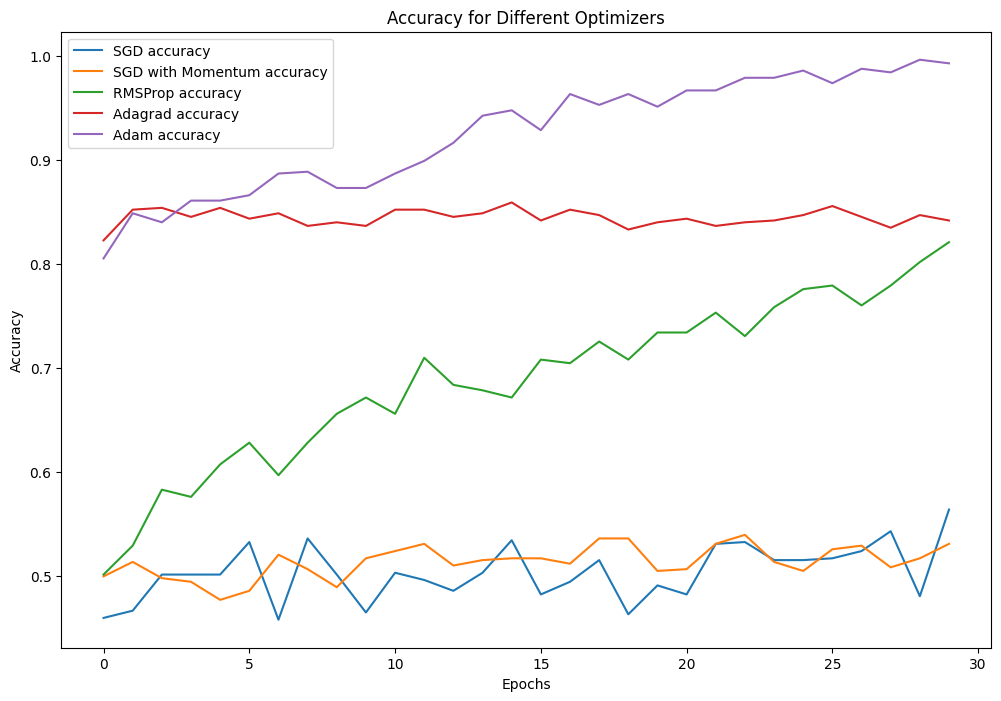

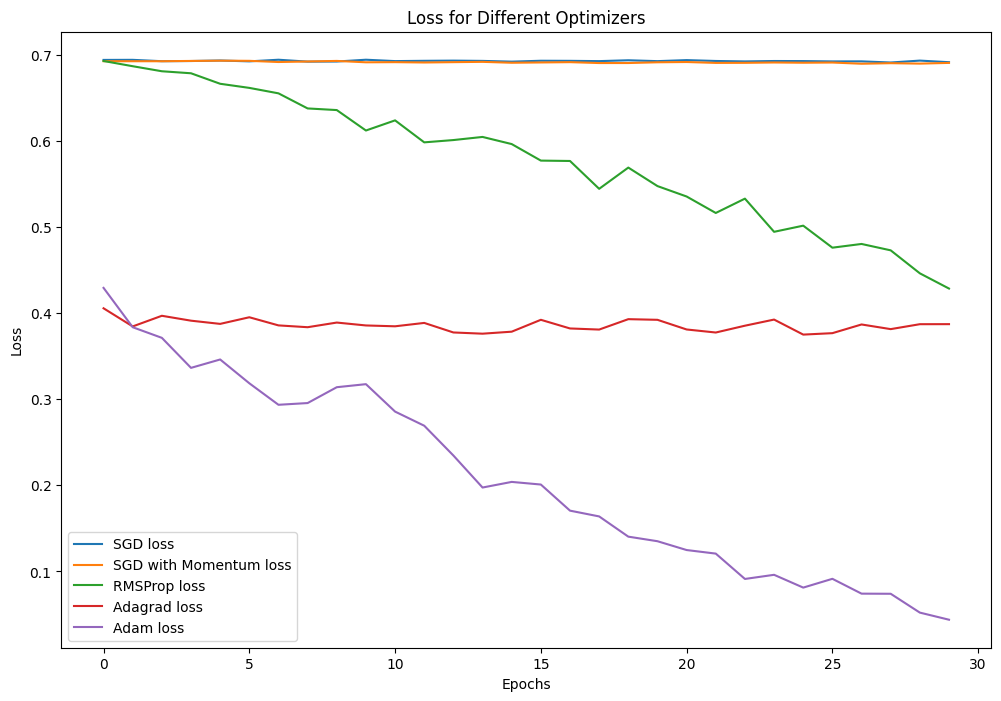

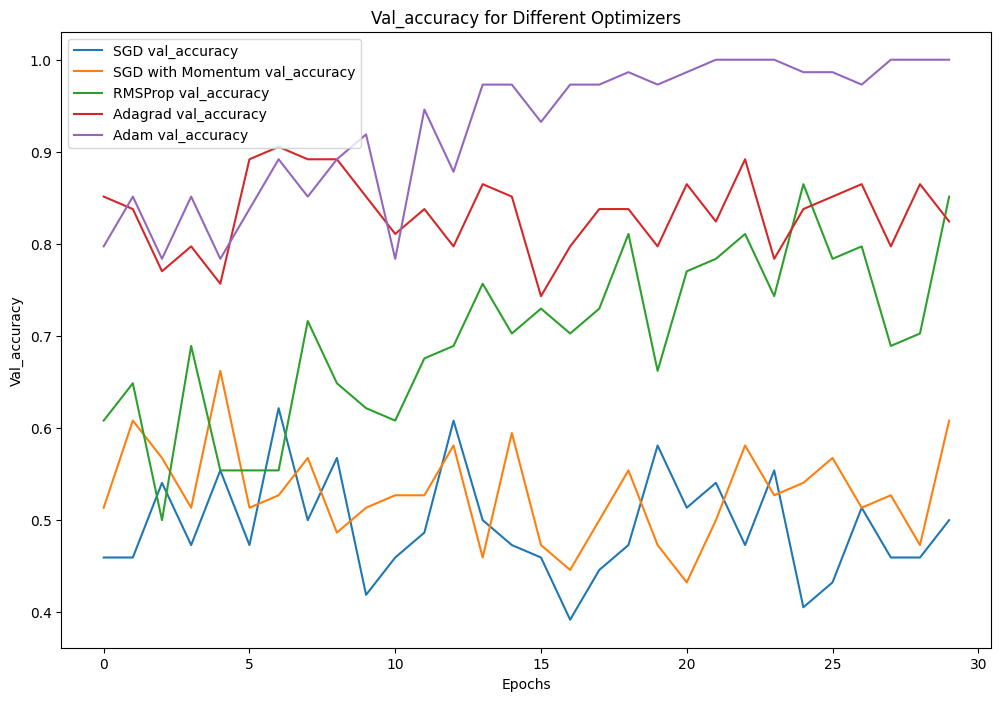

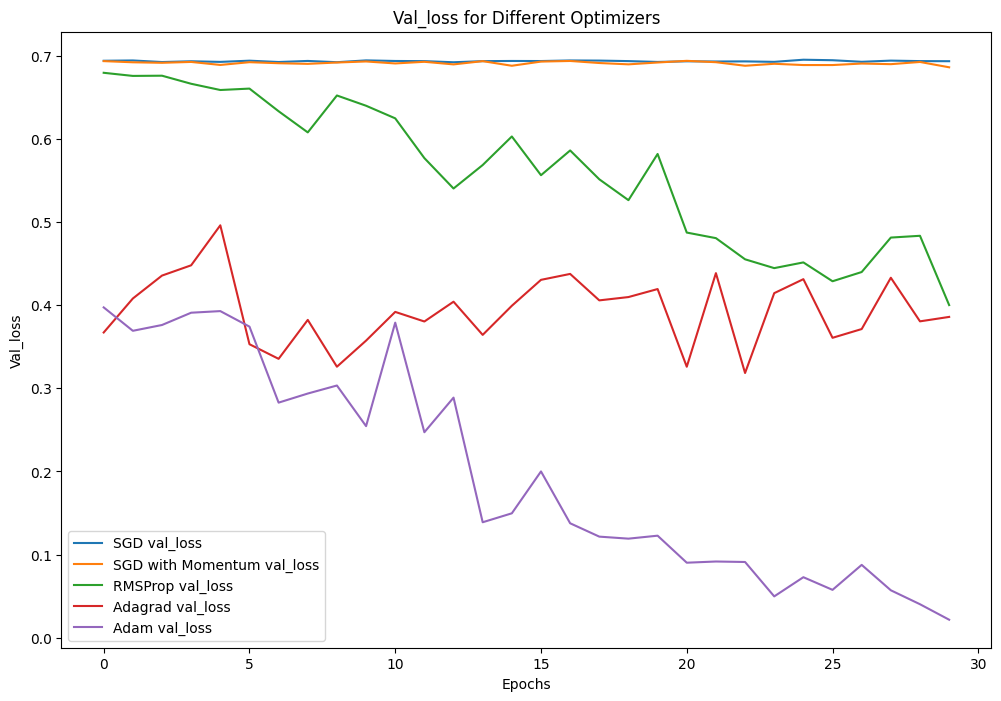

In [ ]:
# Plot the accuracy and loss curves for each optimizer
def plot_metrics(histories, metric):
    plt.figure(figsize=(12, 8))

    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} {metric}')

    plt.title(f'{metric.capitalize()} for Different Optimizers')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot accuracy and loss curves
plot_metrics(histories, 'accuracy')
plot_metrics(histories, 'loss')
plot_metrics(histories, 'val_accuracy')
plot_metrics(histories, 'val_loss')


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train, epochs=30, validation_data=validation_generator, callbacks=[tensorboard_callback])

Epoch 1/30
18/18 [==============================] - 4s 90ms/step - loss: 0.6980 - accuracy: 0.5017 - val_loss: 0.6912 - val_accuracy: 0.6031
Epoch 2/30
18/18 [==============================] - 3s 135ms/step - loss: 0.6896 - accuracy: 0.5139 - val_loss: 0.6866 - val_accuracy: 0.5052
Epoch 3/30
18/18 [==============================] - 2s 101ms/step - loss: 0.6865 - accuracy: 0.5208 - val_loss: 0.6802 - val_accuracy: 0.5155
Epoch 4/30
18/18 [==============================] - 2s 83ms/step - loss: 0.6778 - accuracy: 0.5764 - val_loss: 0.6686 - val_accuracy: 0.5825
Epoch 5/30
18/18 [==============================] - 2s 84ms/step - loss: 0.6676 - accuracy: 0.5955 - val_loss: 0.6550 - val_accuracy: 0.6495
Epoch 6/30
18/18 [==============================] - 2s 81ms/step - loss: 0.6580 - accuracy: 0.6146 - val_loss: 0.6508 - val_accuracy: 0.6237
Epoch 7/30
18/18 [==============================] - 2s 83ms/step - loss: 0.6339 - accuracy: 0.6597 - val_loss: 0.6213 - val_accuracy: 0.6598
Epoch 8/30


Text(0.5, 1.0, 'Loss')

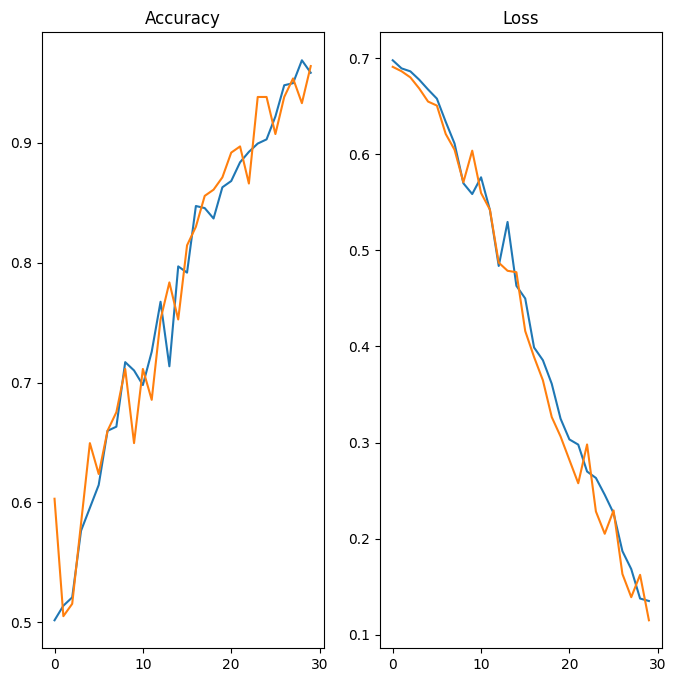

In [ ]:
epochs_range = range(30)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, hist.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, hist.history['loss'], label = 'Training loss')
plt.plot(epochs_range, hist.history['val_loss'], label = 'Validation loss' )
plt.title('Loss')

# **Model Prediction**

Found 650 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
408/408 [==============================] - 2s 4ms/step
Precision: 0.7457
Recall: 0.7353
F1 Score: 0.7325
Classification Report:
              precision    recall  f1-score   support

        Dogs       0.80      0.63      0.70       204
        cats       0.70      0.84      0.76       204

    accuracy                           0.74       408
   macro avg       0.75      0.74      0.73       408
weighted avg       0.75      0.74      0.73       408

Confusion Matrix:
[[129  75]
 [ 33 171]]


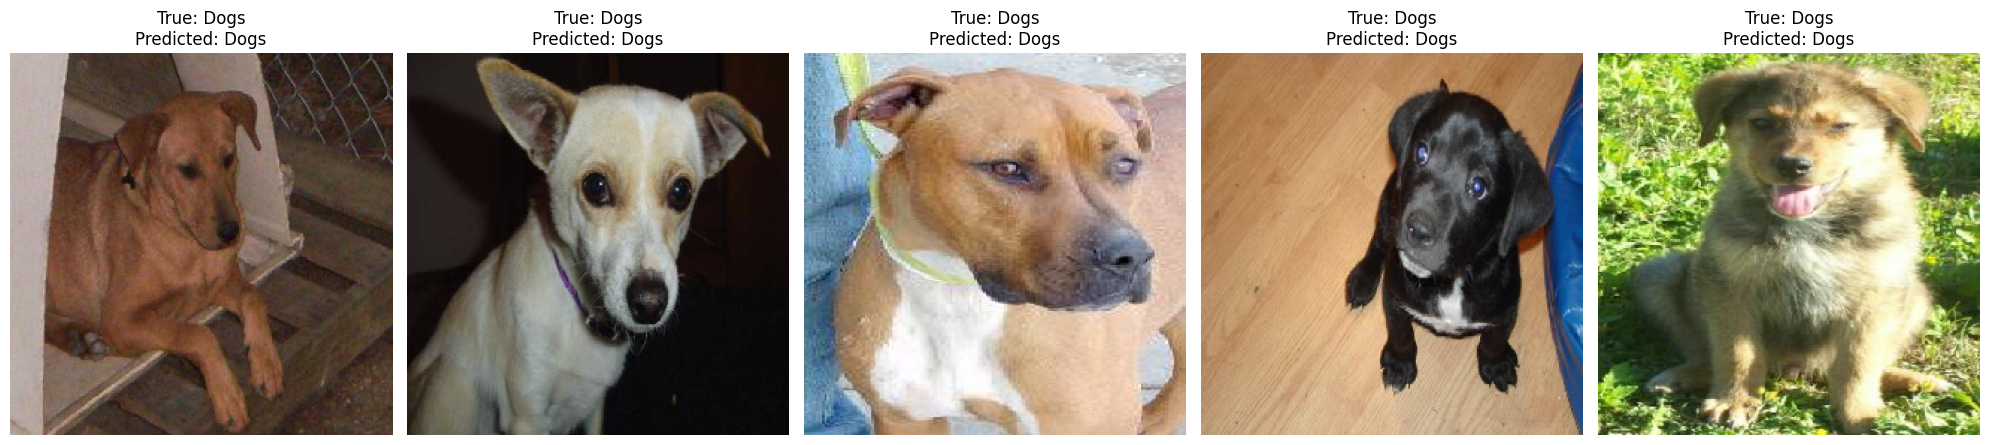

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Prepare data (assuming you have training and validation datasets)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/dataset/test",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for consistent evaluation
)

# Predict using the model
predictions = model.predict(test_generator, steps=test_generator.samples)
predicted_classes = predictions.argmax(axis=-1)

# Get true labels
true_labels = test_generator.classes

# Calculate precision, recall, F1 score, and other metrics
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')
report = classification_report(true_labels, predicted_classes, target_names=list(train_generator.class_indices.keys()))
conf_matrix = confusion_matrix(true_labels, predicted_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Map the predicted labels to the corresponding class indices
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_labels = [class_indices[k] for k in predicted_classes]

# Visualize some predictions
def visualize_predictions(test_generator, predicted_labels, true_labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()
    for i in range(num_images):
        img, _ = test_generator[i]
        img = img.squeeze()
        pred_label = predicted_labels[i]
        true_label = class_indices[true_labels[i]]

        # Plot the image
        axes[i].imshow(img)
        axes[i].set_title(f'True: {true_label}\nPredicted: {pred_label}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the first 10 predictions
visualize_predictions(test_generator, predicted_labels, true_labels, num_images=5)


In [ ]:
model.save('Image Classify.keras')